In [67]:
#Biblotheken
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scienceplots
import matplotlib.patches as patches

In [3]:
#Makroparamter für Plots
plt.rcParams.update({'font.size': 18})
plt.style.use(['science', 'bright'])

# Plot Kennlinie

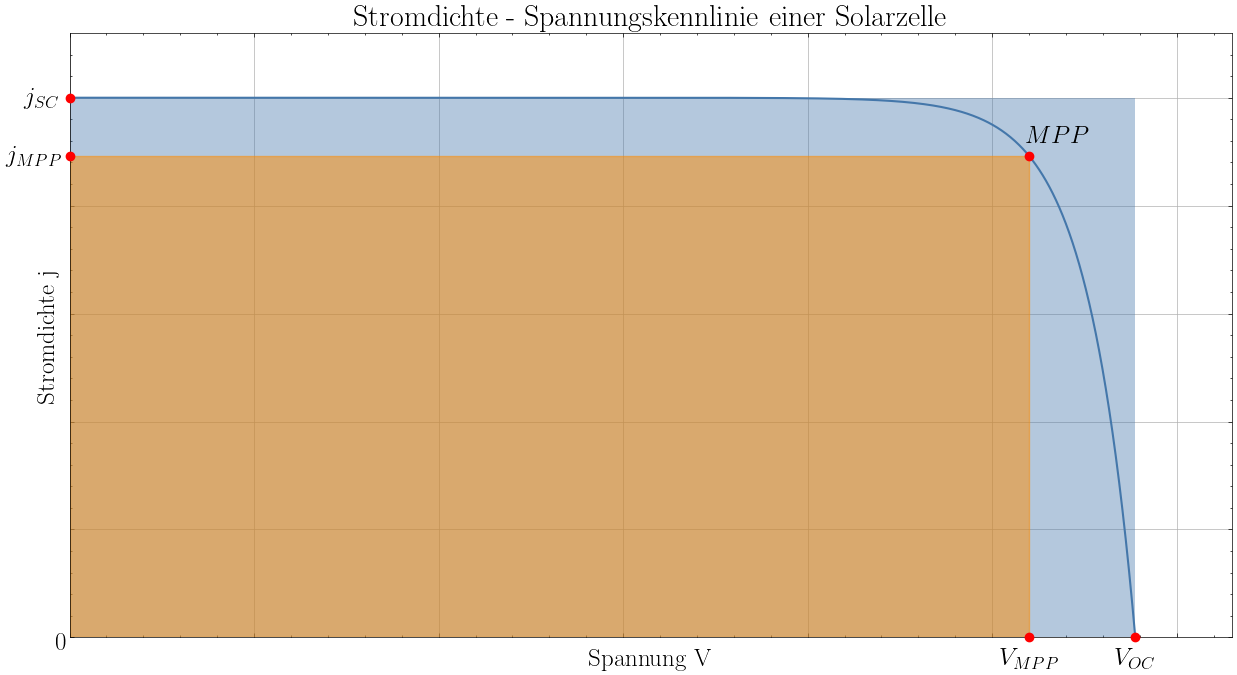

In [100]:
# Konstanten
q = 1.602e-19  # Elementarladung in Coulomb
k = 1.381e-23  # Boltzmann-Konstante in J/K
T = 300  # Temperatur in Kelvin

# Solarzellenparameter
I_ph = 0.5  # Photostrom in Ampere
I_0 = 1e-10  # Sperrstrom in Ampere
n = 1  # Idealfaktor

# Spannungsbereich
V = np.linspace(0, 0.6, 1000)

# Strom-Spannungs-Kurve berechnen
I = I_ph - I_0 * (np.exp(q * V / (n * k * T)) - 1)
V_OC = (k*T)/q *np.log(I_ph/I_0)

# Plotten der I-V-Kurve
fig = plt.figure(figsize=[15,8], dpi=100)
ax = fig.add_subplot(111)

ax.plot(V, I, linewidth = 1.5)

ax.scatter(0,I_ph, zorder = 10,clip_on=False, color = "red")
ax.text(-0.025,I_ph,r"$j_{SC}$", va='center')

ax.scatter(V_OC,0, zorder = 10,clip_on=False, color = "red")
ax.text(V_OC,-0.025,r"$V_{OC}$", ha='center')

ax.add_patch(patches.Rectangle((0, 0), V_OC, I_ph, linewidth=1,alpha = 0.4, zorder = 1))

V_MPP = 0.9*V_OC
J_MPP = I_ph - I_0 * (np.exp(q * V_MPP / (n * k * T)) - 1)
ax.add_patch(patches.Rectangle((0, 0), V_MPP ,J_MPP, linewidth=1,alpha = 0.5, zorder = 1, color = 'darkorange'))

ax.scatter(0,J_MPP, zorder = 10,clip_on=False, color = "red")
ax.text(-0.035,J_MPP,r"$j_{MPP}$", va='center')

ax.scatter(V_MPP,0, zorder = 10,clip_on=False, color = "red")
ax.text(V_MPP,-0.025,r"$V_{MPP}$", ha='center')

ax.scatter(V_MPP,J_MPP, zorder = 10,clip_on=False, color = "red")
ax.text(V_MPP + 0.015,J_MPP+ 0.012,r"$MPP$", ha='center')

ax.set_xlabel('Spannung V')
ax.set_ylabel('Stromdichte j')
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.text(-0.005,-0.005,0, va='center', ha = 'center')
ax.set_title('Stromdichte - Spannungskennlinie einer Solarzelle')

ax.set_ylim(ymin = 0)
ax.set_xlim(xmin = 0)
ax.grid(True)
#ax.legend()

ax.set_axisbelow(True)


plt.savefig("bilder/SolarzelleIdeal.pdf")
